# Analysis of 2020 LinkedIn API Leak - Israel

In 2021, data scraped from LinkedIn appeared on underground forums: 
- https://bgr.com/tech/new-linkedin-data-leak-exposed-details-of-more-than-90-of-users/
- https://www.bbc.com/news/business-57841239

This is just a small look at some of the Israeli portion of the data.

First, import `pandas`.

In [2]:
import pandas as pd

Then, load up the data.

In [3]:
df = pd.read_csv('Israel-Linkedin-180,745.csv')

Let's have a quick look at the dimensions of the data:

In [8]:
print(f'Number of rows: {len(df.index)}')
print(f'Number of columns: {len(df.columns)}')
print(f'Number of cells: {len(df.index)*len(df.columns)}')
print(f'Number of null values: {df.isna().sum().sum()}')
print(f'Percentage null values: {round(df.isna().sum().sum()/(len(df.index)*len(df.columns))*100, 2)}%')

Number of rows: 180745
Number of columns: 27
Number of cells: 4880115
Number of null values: 2469796
Percentage null values: 50.61%


What columns do we have?

In [9]:
df.columns

Index(['Age', 'address', 'address_line_2', 'birth_date', 'birth_year',
       'country', 'domain', 'facebook_url', 'facebook_username', 'first_name',
       'full_name', 'gender', 'industry', 'job_title', 'last_name',
       'linkedin_url', 'linkedin_username', 'locality', 'majors', 'metro',
       'middle_initial', 'middle_name', 'mobile_phone', 'postal_code',
       'street_address', 'twitter_url', 'twitter_username'],
      dtype='object')

Let's make a column for `email_domain` to extract common company domains.

In [11]:
df['email_domain'] = pd.DataFrame({'email_domain':[x['address'].split('@')[1] for x in df[['address']].to_dict('records')]})

Now let's get rid of anything with a null value under `job_title` since we're going to be using it in aggregations.

In [12]:
df_jobtitle_notna = df[df['job_title'].notna()]

Cool! Let's query the data frame with a `contains` operator on the `job_title` column, looking for anything with `security research` in the title.

In [16]:
df_jobtitle_notna[df_jobtitle_notna['job_title'].str.contains('security research')][[
   'first_name', 'job_title', 'email_domain'
]]

,first_name,job_title,email_domain
2817,eran,security researcher,cybereason.com
7696,guy,security researcher,gmail.com
9273,robert,security researcher,gmail.com
12081,eyal,security researcher,preemptsecurity.com
12471,avishai,security researcher,gmail.com
...,...,...,...
175513,nir,security researcher,gmail.com
176132,simon,security researcher,trustwave.com
176361,daniel,senior security researcher,nyotron.com
178215,deena,security research and advanced architecture lead,radware.com


Let's do the same null value removal on the `address` columns-- that's the email address.

In [17]:
df_address_notna = df[df['address'].notna()]

Let's look for Technion employees by running the `contains` operator on the `address` field. We could also use the `email_domain` field since we dervied that from `address`.

In [19]:
df_address_notna[df_address_notna['address'].str.contains('technion.ac.il')][[
   'first_name', 'job_title', 'email_domain'
]]

,first_name,job_title,email_domain
4,fadi,ph.d student - technion,tx.technion.ac.il
340,bliumkin,NaN,tx.technion.ac.il
477,ury,profesor - technion,ie.technion.ac.il
945,mona,"south san francisco, california",tx.technion.ac.il
1149,david,professor,technion.ac.il
...,...,...,...
180102,daniel,distinguished professor emeritus,tx.technion.ac.il
180118,elazar,"jezreel valley area, israel",tx.technion.ac.il
180134,larisa,mass spectrometry lab manager,tx.technion.ac.il
180175,kolar,head office of the executive vice president fo...,technion.ac.il


Anyone from NSO Group?

In [20]:
df_address_notna[df_address_notna['address'].str.contains('nsogroup')][[
   'first_name', 'job_title', 'email_domain'
]]

,first_name,job_title,email_domain
1324,omri,co-founder and chief executive officer,nsogroup.com
4523,nimrod,researching,nsogroup.com
6360,yevgeni,co-founder and chief technology officer,nsogroup.com
7171,michael,mobile develop team lead,nsogroup.com
25821,ofir,NaN,nsogroup.com
38330,enav,director business marketing,nsogroup.com
39860,heidi,medical doctor,nsogroup.com
53364,dana,product manager,nsogroup.com
55706,vered-li,qa engineer,nsogroup.com
56583,maria,bookkeeper,nsogroup.com


group by job title

In [21]:
df_address_notna[df_address_notna['address'].str.contains('nsogroup')] \
    .groupby('job_title') \
    .size() \
    .sort_values(ascending=False) \
    .reset_index(name='volume')
    
    

,job_title,volume
0,software engineer,3
1,android team leader,1
2,medical doctor,1
3,technical project manager,1
4,technical product manager,1
5,talent acquisition team leader,1
6,system integration engineer,1
7,security research team leader,1
8,sales regional vice president,1
9,researching,1


How many people work at `facebook.com`?

In [49]:
len(df_address_notna[df_address_notna['email_domain'].str.contains('facebook.com')])

27

What kind of roles do they have?

In [50]:
df_address_notna[df_address_notna['email_domain'].str.contains('facebook.com')] \
    .groupby('job_title') \
    .size() \
    .sort_values(ascending=False) \
    .reset_index(name='volume')

,job_title,volume
0,software engineer,3
1,engineering manager,2
2,accounting,1
3,pharmacist,1
4,weizmann institute of science,1
5,vice president resources management,1
6,studio managing partner,1
7,"small business products, product lead",1
8,senior software engineer,1
9,"senior associate, assurance services | high - ...",1


Let's break this down even more by look at job titles, and the top companies with that title/role.

First we need to make a combo dataframe where both `job_title` and `address` are both `notna`.

In [51]:
df_address_jobtitle_notna = df_address_notna[df_address_notna['job_title'].notna()]
df_address_jobtitle_notna

,Age,address,address_line_2,birth_date,birth_year,country,domain,facebook_url,facebook_username,first_name,...,majors,metro,middle_initial,middle_name,mobile_phone,postal_code,street_address,twitter_url,twitter_username,email_domain
2,NaN,galit.saban@scrdairy.com,NaN,NaN,NaN,israel,netanya.ac.il,facebook.com/netanyacollege.ac,NaN,galit,...,NaN,NaN,NaN,NaN,NaN,NaN,18 haomanut street,twitter.com/netanyacollege,NaN,scrdairy.com
3,NaN,hadas.pravda@kendago.com,NaN,NaN,NaN,israel,bgu.ac.il,facebook.com/bgu.uni,NaN,hadas,...,computer science,NaN,NaN,NaN,NaN,NaN,NaN,twitter.com/bengurionuni,NaN,kendago.com
4,NaN,fqzl@tx.technion.ac.il,NaN,NaN,NaN,israel,technion.ac.il,facebook.com/technion.israel,NaN,fadi,...,philosophy,NaN,NaN,NaN,NaN,NaN,NaN,twitter.com/technionlive,NaN,tx.technion.ac.il
5,NaN,shaulialsberg@gmail.com,NaN,NaN,NaN,israel,shenkar.ac.il,facebook.com/shenkar.college,NaN,shauli,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com
6,NaN,ozidine@gmail.com,NaN,NaN,NaN,israel,NaN,NaN,NaN,ozi,...,NaN,NaN,NaN,NaN,NaN,NaN,234 herzl street,NaN,NaN,gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180740,NaN,einats@bll.co.il,NaN,NaN,NaN,israel,huji.ac.il,facebook.com/thehebrewuniversity,NaN,einat,...,economics,NaN,NaN,NaN,NaN,NaN,NaN,twitter.com/hebrewu,NaN,bll.co.il
180741,NaN,hoginelli@hotmail.com,NaN,NaN,NaN,israel,NaN,NaN,NaN,fred,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hotmail.com
180742,NaN,dror.zelig@ecitele.com,NaN,NaN,NaN,israel,huji.ac.il,facebook.com/thehebrewuniversity,dror.zelig,dror,...,geography,NaN,NaN,NaN,NaN,NaN,NaN,twitter.com/hebrewu,NaN,ecitele.com
180743,NaN,saba.maryam@ngo-monitor.org,NaN,NaN,NaN,israel,NaN,NaN,NaN,saba,...,NaN,NaN,NaN,NaN,NaN,NaN,1 ben maimon boulevard,twitter.com/ngomonitor,NaN,ngo-monitor.org


So, where do all the Israeli security researchers work?

In [52]:
df_address_jobtitle_notna[df_address_jobtitle_notna['job_title'].str.contains('security research')] \
    .groupby('email_domain') \
    .size() \
    .sort_values(ascending=False) \
    .reset_index(name='volume')

,email_domain,volume
0,gmail.com,47
1,intel.com,8
2,checkpoint.com,8
3,imperva.com,7
4,cybereason.com,3
5,nyotron.com,3
6,paloaltonetworks.com,3
7,kaymera.com,2
8,ibm.com,2
9,radware.com,2


`gmail.com` of course! hahahaha.

Fun plot time:

In [53]:
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'gmail.com'),
  Text(1, 0, 'intel.com'),
  Text(2, 0, 'checkpoint.com'),
  Text(3, 0, 'imperva.com'),
  Text(4, 0, 'cybereason.com'),
  Text(5, 0, 'nyotron.com'),
  Text(6, 0, 'paloaltonetworks.com'),
  Text(7, 0, 'kaymera.com'),
  Text(8, 0, 'ibm.com'),
  Text(9, 0, 'radware.com'),
  Text(10, 0, 'mcafee.com'),
  Text(11, 0, 'cyberark.com'),
  Text(12, 0, 'comsecglobal.com'),
  Text(13, 0, 'citadel.co.il'),
  Text(14, 0, 'medigate.io')])

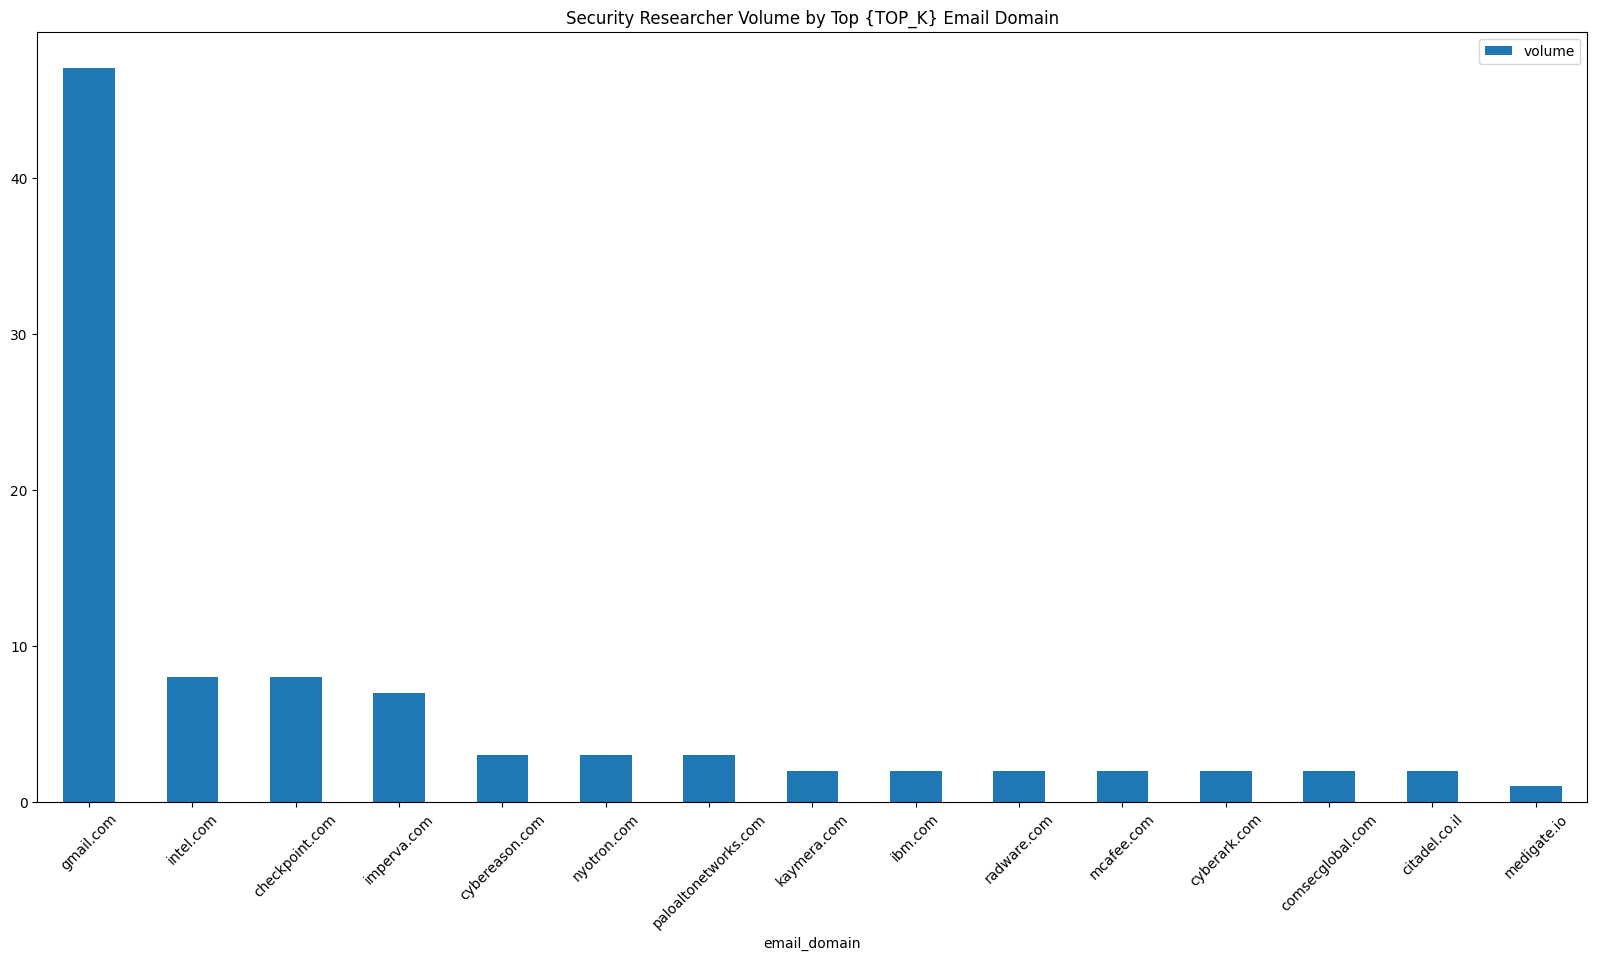

In [54]:
TOP_K = 15
df_address_jobtitle_notna[df_address_jobtitle_notna['job_title'].str.contains('security research')] \
    .groupby('email_domain') \
    .size() \
    .sort_values(ascending=False) \
    .reset_index(name='volume') \
    .set_index('email_domain') \
    .head(TOP_K) \
    .plot(kind='bar', figsize=(20, 10), title='Security Researcher Volume by Top {TOP_K} Email Domain')

plt.xticks(rotation=45)

I wonder what exact job titles those Intel folks have got.

In [55]:
df_address_jobtitle_notna[
    df_address_jobtitle_notna['email_domain'].str.contains('intel.com') &
    df_address_jobtitle_notna['job_title'].str.contains('security research')
] \
    .groupby('job_title') \
    .size() \
    .sort_values(ascending=False) \
    .reset_index(name='volume')

,job_title,volume
0,security researcher,6
1,embedded security researcher,1
2,security research team manager,1


OK let's take `gmail.com` out, and just look at top email domains for folks with `security` in their job title.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'hotmail.com'),
  Text(1, 0, 'yahoo.com'),
  Text(2, 0, 'checkpoint.com'),
  Text(3, 0, 'intel.com'),
  Text(4, 0, 'elalusa.com'),
  Text(5, 0, 'iec.co.il'),
  Text(6, 0, 'ibm.com'),
  Text(7, 0, 'comsecglobal.com'),
  Text(8, 0, '2bsecure.co.il'),
  Text(9, 0, 'radware.com'),
  Text(10, 0, 'amdocs.com'),
  Text(11, 0, 'bezeq.co.il'),
  Text(12, 0, 'netvision.net.il'),
  Text(13, 0, 'walla.co.il'),
  Text(14, 0, 'imperva.com')])

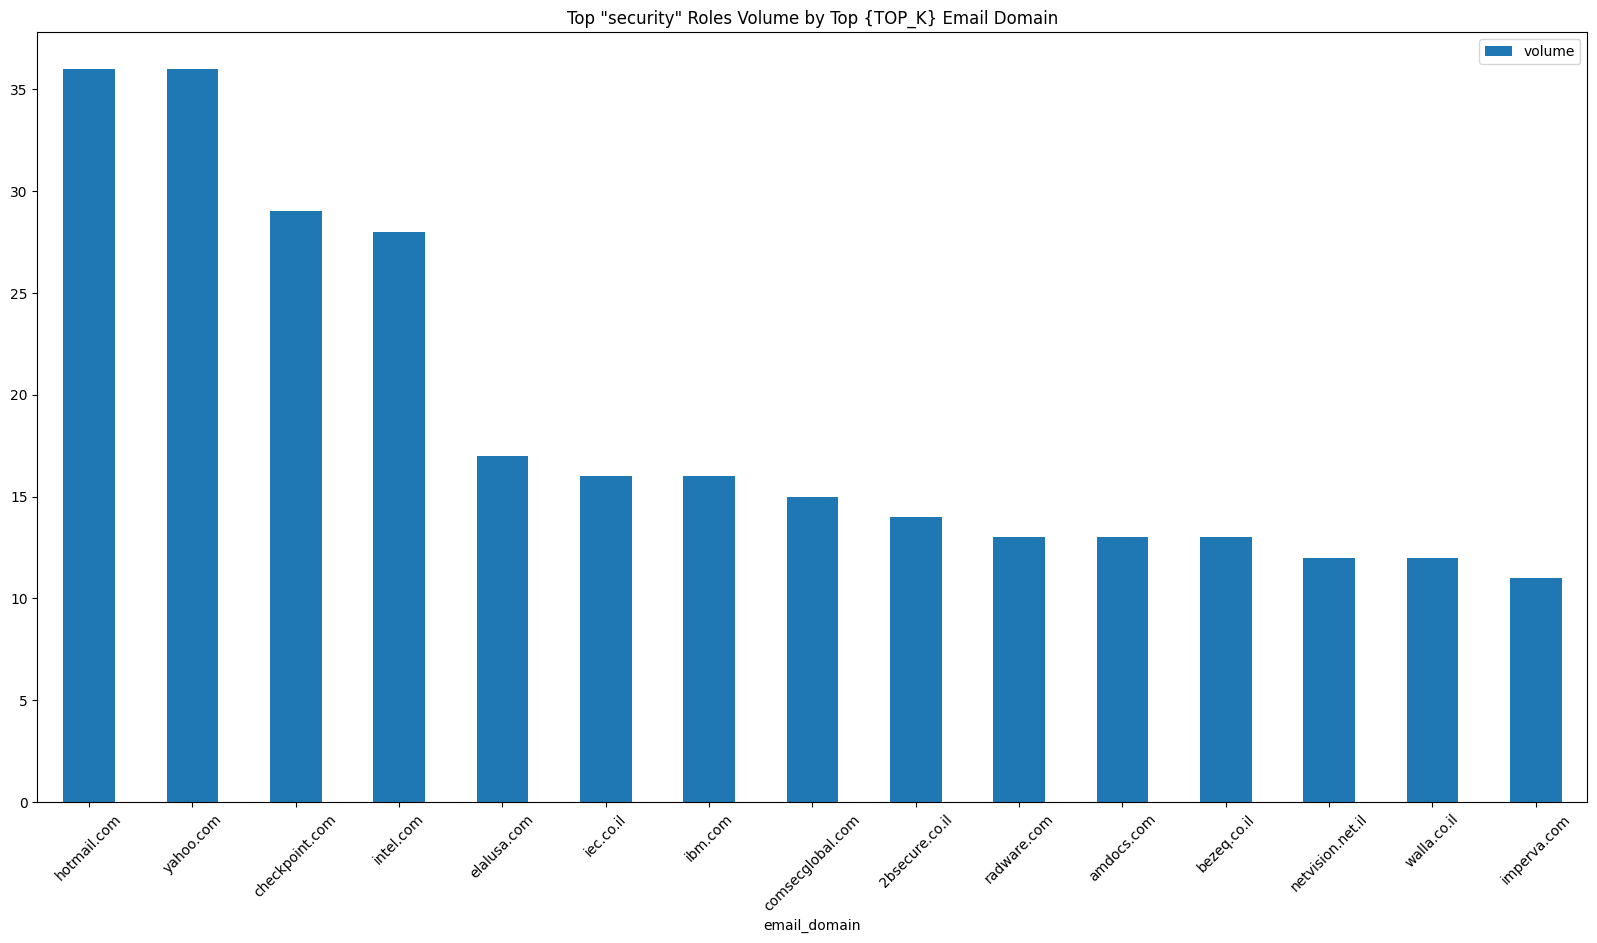

In [56]:
TOP_K = 15
df_address_jobtitle_notna[
    df_address_jobtitle_notna['job_title'].str.contains('security') &
    ~df_address_jobtitle_notna['email_domain'].str.contains('gmail.com')
] \
    .groupby('email_domain') \
    .size() \
    .sort_values(ascending=False) \
    .reset_index(name='volume') \
    .set_index('email_domain') \
    .head(TOP_K) \
    .plot(kind='bar', figsize=(20, 10), title='Top "security" Roles Volume by Top {TOP_K} Email Domain')

plt.xticks(rotation=45)

Cool way to visualize the top players in the Israeli security space, according to this small sample from LinkedIn.